#  Linear Regression

### Import libraries

In [1]:
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt

from sklearn.dummy import DummyRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, median_absolute_error
from sklearn import metrics

### Upload data

In [2]:
url = "https://raw.githubusercontent.com/Agablue-red/Machine-Learning/master/data/data_rate.csv"
data = pd.read_csv(url, index_col=0)

In [3]:
data.head()

,symbol,sector,score,Date,return_rate,close
65,AEE,Utilities,0.670127,2004-02-11,0.002350,70.309999
40,AOS,Producer Manufacturing,0.753176,2004-02-11,0.007533,8.005000
5,APA,Energy Minerals,0.912117,2004-02-11,0.005808,59.630001
66,ARLP,Energy Minerals,0.669621,2004-02-11,-0.011510,13.578750
63,ATO,Utilities,0.672410,2004-02-11,0.000765,39.230000


### Information about dataset

Data types:

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30324 entries, 65 to 37350
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   symbol       30324 non-null  object 
 1   sector       30324 non-null  object 
 2   score        30324 non-null  float64
 3   Date         30324 non-null  object 
 4   return_rate  30324 non-null  float64
 5   close        30324 non-null  float64
dtypes: float64(3), object(3)
memory usage: 1.6+ MB


Changing the type of 'date' variable:

In [5]:
data["Date"] = pd.to_datetime(data["Date"])
data = data.set_index('Date')
data.sort_index(inplace=True)

In [6]:
data.head()

,symbol,sector,score,return_rate,close
Date,,,,,
2004-02-11,AEE,Utilities,0.670127,0.002350,70.309999
2004-02-11,AOS,Producer Manufacturing,0.753176,0.007533,8.005000
2004-02-11,APA,Energy Minerals,0.912117,0.005808,59.630001
2004-02-11,ARLP,Energy Minerals,0.669621,-0.011510,13.578750
2004-02-11,ATO,Utilities,0.672410,0.000765,39.230000


#### Fundamental statistics on numeric variables

In [7]:
data.describe()

,score,return_rate,close
count,30324.000000,30324.000000,30324.000000
mean,0.731377,0.008940,199.862674
std,0.117693,0.152564,5225.047203
min,0.413554,-0.507207,0.030000
25%,0.653702,-0.018704,51.757969
50%,0.741667,0.007707,89.154999
75%,0.813701,0.034849,148.037234
max,0.987225,24.600929,898434.375000


There are in total 30 324 observations. The mean score for this dataset is 0,73, while mean return rate is 0,009 and mean closing price is 199.86.

In [8]:
data.symbol.value_counts()

SHW      170
GEF      140
ORLY     138
GPC      122
INGR     122
        ... 
H          1
PRMW       1
CWYUF      1
ULH        1
POST       1
Name: symbol, Length: 1322, dtype: int64

There are 1322 companies in total, some of them occur only once in the time series and some even over 100 times. 

### Splitting the data into training and test sets

Training set involves data from 2010 to 2020 and test set includes the year 2021.


In [9]:
X_train = data['2010':'2020'].drop(['symbol','return_rate','sector','close'], axis = 1)
y_train = data.loc['2010':'2020', 'return_rate']

X_test = data['2021':'2022'].drop(['symbol','return_rate','sector','close'], axis = 1)
y_test = data.loc['2021':'2022', 'return_rate']

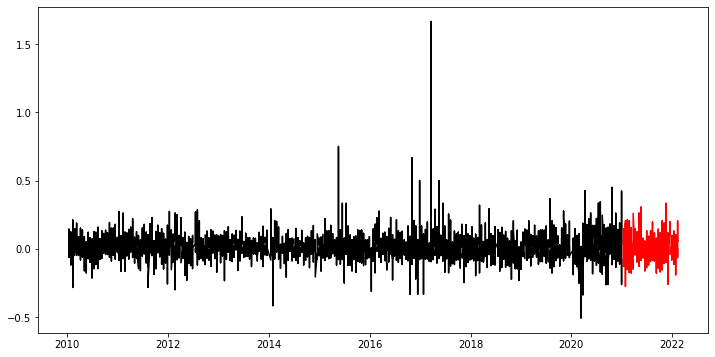

In [10]:
fig, ax=plt.subplots(figsize=(12, 6))

plt.plot(y_train, color = "black")
plt.plot(y_test, color = "red")

In [11]:
print("Number transactions X_train dataset: ", X_train.shape)
print("Number transactions y_train dataset: ", y_train.shape)
print("Number transactions X_test dataset: ", X_test.shape)
print("Number transactions y_test dataset: ", y_test.shape)

Number transactions X_train dataset:  (19568, 1)
Number transactions y_train dataset:  (19568,)
Number transactions X_test dataset:  (2281, 1)
Number transactions y_test dataset:  (2281,)


### Dummy regression

In [12]:
# train model
reg_dummy = DummyRegressor(strategy = 'mean').fit(X_train, y_train) 

print('Coefficient of determination:', reg_dummy.score(X_train, y_train))

Coefficient of determination: 0.0


0% indicates thet the model does not fit the training data.

In [13]:
# predict & evaluate
y_pred_dum = reg_dummy.predict(X_test)

print("Coefficient of determination (R2): %.5f" % r2_score(y_test , y_pred_dum) )
print("Mean absolute error (MAE): %.5f" % np.mean(np.absolute(y_pred_dum - y_test)))
print("Residual sum of squares (MSE): %.5f" % mean_squared_error(y_test, y_pred_dum))
print("Root mean squared error (RMSE): %.5f" % np.sqrt(metrics.mean_squared_error(y_test, y_pred_dum)))

Coefficient of determination (R2): -0.00021
Mean absolute error (MAE): 0.04415
Residual sum of squares (MSE): 0.00348
Root mean squared error (RMSE): 0.05903


### Linear regression

In [14]:
# train model
lm = LinearRegression().fit(X_train, y_train)

print('Coefficient of determination:', round(lm.score(X_train, y_train),3))
print('Intercept:', round(lm.intercept_,3))
print('Slope:', lm.coef_)

Coefficient of determination: 0.001
Intercept: 0.019
Slope: [-0.01473271]


f(x) = b₁x + b₀

f(x) = -0.015x + 0.019

𝑅² = 0.001

~1% indicates thet the model does not fit the training data.

**Measure of fit a model**

In [15]:
# predict & evaluate
y_pred = lm.predict(X_test)

print('predicted response:', y_pred, sep='\n')

print("Coefficient of determination (R2): %.5f" % r2_score(y_test , y_pred) )
print("Mean absolute error (MAE): %.5f" % np.mean(np.absolute(y_pred - y_test)))
print("Residual sum of squares (MSE): %.5f" % mean_squared_error(y_test, y_pred))
print("Root mean squared error (RMSE): %.5f" % np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

predicted response:
[0.0102615  0.01015033 0.01034015 ... 0.00492247 0.00842538 0.00830968]
Coefficient of determination (R2): -0.00067
Mean absolute error (MAE): 0.04414
Residual sum of squares (MSE): 0.00349
Root mean squared error (RMSE): 0.05904


Adjusted R squared  is adjusted for the number of independent variables in the model and equal -0.00067 (adjusted  R² will always be less than or equal to R²).

The average of the residuals equal 0.04414.

The variance of the residuals equal 0.00349.

The standard deviation of residuals equal 0.05904.

### Comparison between dummy regression and linear regression combinaed with observations from the test set.

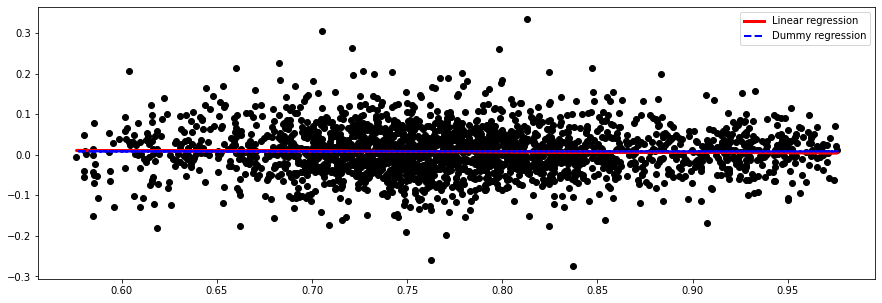

In [16]:
fig, ax=plt.subplots(figsize=(15, 5))

plt.scatter(X_test, y_test,  color='black')
plt.plot(X_test, y_pred, color='red', linewidth=3, label='Linear regression')
plt.plot(X_test, y_pred_dum, color='blue', linestyle = 'dashed', linewidth=2, label = 'Dummy regression')
ax.legend()

Model does not explain any of the variation in the response variable around its mean.

Linear regression is marginally better than dummy regression.

Both models do not fit the variables.